# **BLACK FRIDAY SALES- ANALYSIS AND PREDICTION**
* Black Friday is a colloquial term for the Friday following Thanksgiving Day in the United States. Many stores offer highly promoted sales on Black Friday and open very early, or some time on Thanksgiving Day. Black Friday has routinely been the busiest shopping day of the year in the United States since at least 2005

- For prediction, we will use following algorithms:

1. Linear Regression

2. Lasso Regression

3. Ridge Regression

4. Decision Tree Regressor

5. Random Forest Regressor

- By using the above algorithms, we will firstly explore the data that we have and check for any null or missing values. If found then we'll clean tha data and then visualize it for better understanding and draw insights.
- Then we'll proceed by data training i.e. spliting data into training and testing data.Then train our model by providing training data and once the model will be trained, we will perform prediction for the test data.
- At last, we will evaluate the performance of these algorithmns by error check and accuracy check.

- Steps followed are as:

  Step 1: Data Exploration

  Step 2: Data Cleaning

  Step 3: Data Visualization

  Step 4: Data Preparation & Training

  Step 5: Model Creation

  Step 6: Performance Evaluation

For the dataset being used in this project [click here ](https://www.kaggle.com/sdolezel/black-friday?select=train.csv)

## **Data Exploration**

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/train.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,P00131042,F,36-45,20,B,3,0,8,NaN,NaN,5950.0
135525,1002934,P00049542,F,36-45,20,B,3,0,8,NaN,NaN,6005.0
135526,1002934,P00303242,F,36-45,20,B,3,0,5,8.0,NaN,5364.0
135527,1002934,P00222842,F,36-45,20,B,3,0,8,NaN,NaN,8094.0


In [3]:
data.shape

(135529, 12)

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
135524,1002934,P00131042,F,36-45,20,B,3,0,8,NaN,NaN,5950.0
135525,1002934,P00049542,F,36-45,20,B,3,0,8,NaN,NaN,6005.0
135526,1002934,P00303242,F,36-45,20,B,3,0,5,8.0,NaN,5364.0
135527,1002934,P00222842,F,36-45,20,B,3,0,8,NaN,NaN,8094.0
135528,1002934,P00210642,F,36-45,20,B,3,0,8,14.0,NaN,NaN


In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135529 entries, 0 to 135528
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     135529 non-null  int64  
 1   Product_ID                  135529 non-null  object 
 2   Gender                      135529 non-null  object 
 3   Age                         135529 non-null  object 
 4   Occupation                  135529 non-null  int64  
 5   City_Category               135529 non-null  object 
 6   Stay_In_Current_City_Years  135529 non-null  object 
 7   Marital_Status              135529 non-null  int64  
 8   Product_Category_1          135529 non-null  int64  
 9   Product_Category_2          93339 non-null   float64
 10  Product_Category_3          41376 non-null   float64
 11  Purchase                    135528 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 12.4+ MB


In [9]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.355290e+05,135529.000000,135529.000000,135529.000000,93339.000000,41376.000000,135528.000000
mean,1.002809e+06,8.088549,0.409093,5.301559,9.854691,12.659054,9300.093700
std,1.721283e+03,6.535047,0.491668,3.742286,5.085732,4.120779,4980.141216
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001322e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5847.000000
50%,1.002664e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8051.000000
75%,1.004258e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12057.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


Check for null values:

In [10]:
data.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            42190
Product_Category_3            94153
Purchase                          1
dtype: int64

In [11]:
data.isnull().sum().sum()

136344

There are total 136344 null values in the data set which we need to either replace or remove.

## **Data Cleaning**

In [12]:
data['Product_Category_2'].isnull().sum()

42190

In [13]:
data['Product_Category_2'].mean()

9.854690965191399

In [14]:
data['Product_Category_2'].fillna('9',inplace=True)

In [15]:
data['Product_Category_2'].isnull().sum()

0

In [16]:
data['Product_Category_3'].isnull().sum()

94153

In [17]:
data['Product_Category_3'].mean()

12.659053557617943

In [18]:
data['Product_Category_3'].fillna('12',inplace=True)

In [19]:
data['Product_Category_3'].isnull().sum()

0

In [20]:
data['Purchase'].isnull().sum()

1

In [21]:
data['Purchase'].mean()

9300.093700194793

In [22]:
data['Purchase'].fillna('9300',inplace=True)

In [23]:
data['Purchase'].isnull().sum()

0

In [24]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [25]:
data.isnull().sum().sum()

0

The data is now cleaned i.e. there are no missing or null values.

## **Data Visualization**

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Gender of the person ')

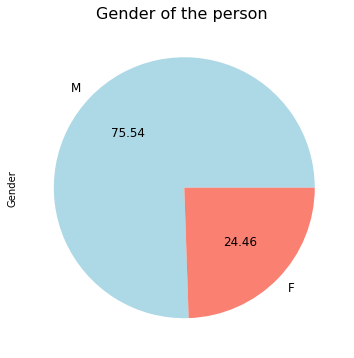

In [28]:
data['Gender'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightblue','salmon'])
plt.title("Gender of the person ",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


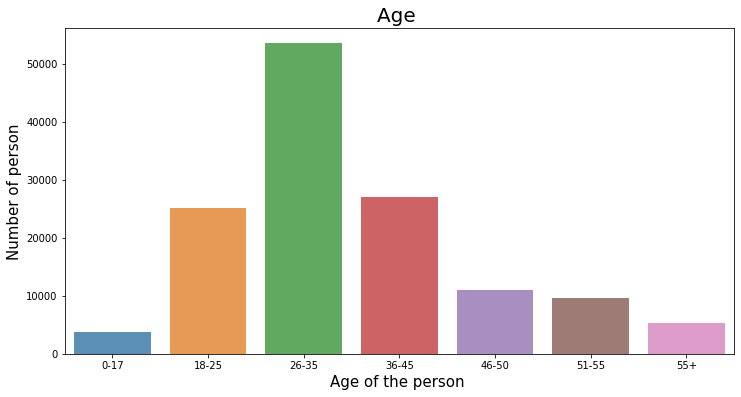

In [30]:
count=data['Age'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.8)
plt.title("Age ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Age of the person ", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


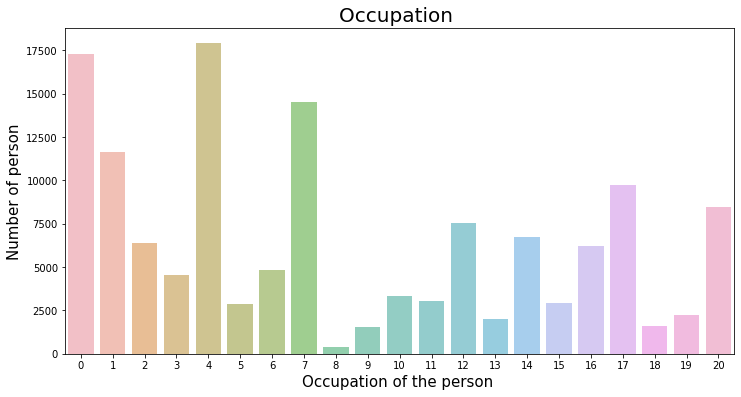

In [31]:
count=data['Occupation'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.title("Occupation ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("Occupation of the person ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'City of the person ')

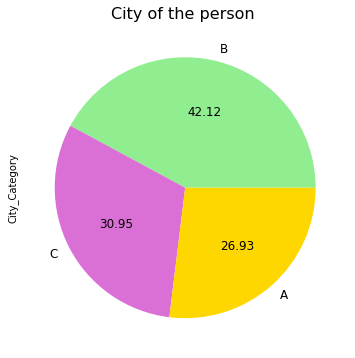

In [32]:
data['City_Category'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightgreen','orchid','gold'])
plt.title("City of the person ",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


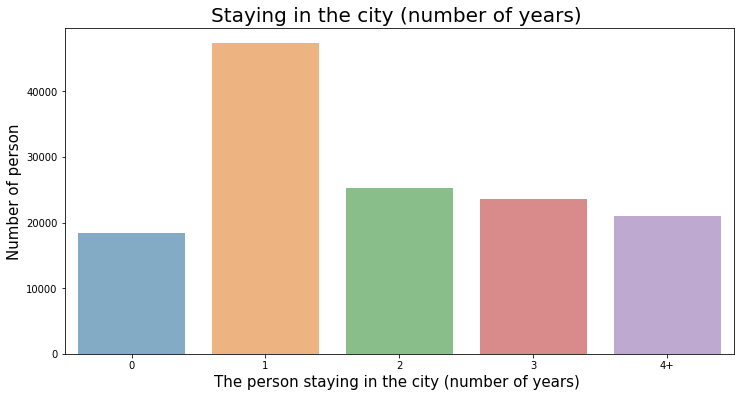

In [35]:
count=data['Stay_In_Current_City_Years'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.title("Staying in the city (number of years) ", fontsize=20)
plt.ylabel('Number of person', fontsize=15)
plt.xlabel("The person staying in the city (number of years) ", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Marital Status of the person ')

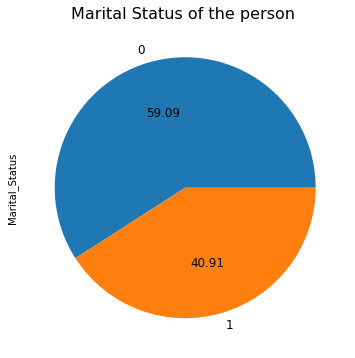

In [36]:
data['Marital_Status'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title("Marital Status of the person ",fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


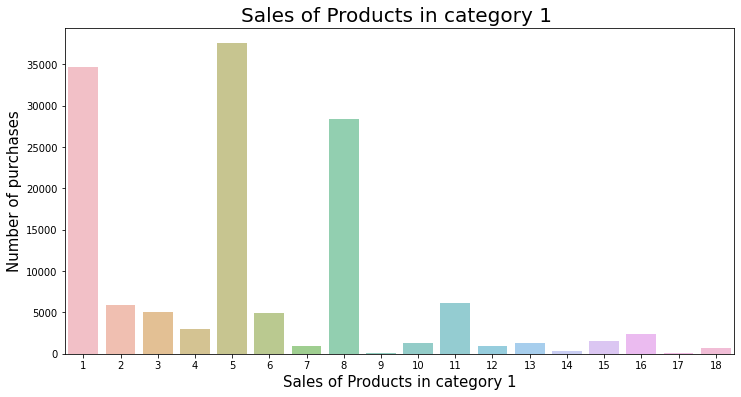

In [38]:
count=data['Product_Category_1'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.6)
plt.title("Sales of Products in category 1 ", fontsize=20)
plt.ylabel('Number of purchases', fontsize=15)
plt.xlabel("Sales of Products in category 1", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


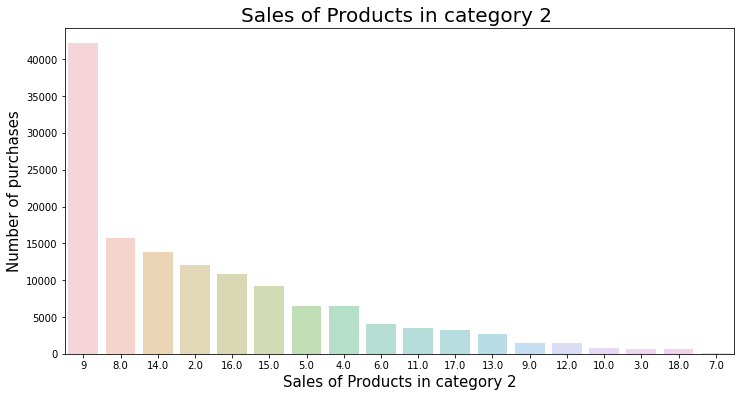

In [40]:
count=data['Product_Category_2'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.4)
plt.title("Sales of Products in category 2 ", fontsize=20)
plt.ylabel('Number of purchases', fontsize=15)
plt.xlabel("Sales of Products in category 2", fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


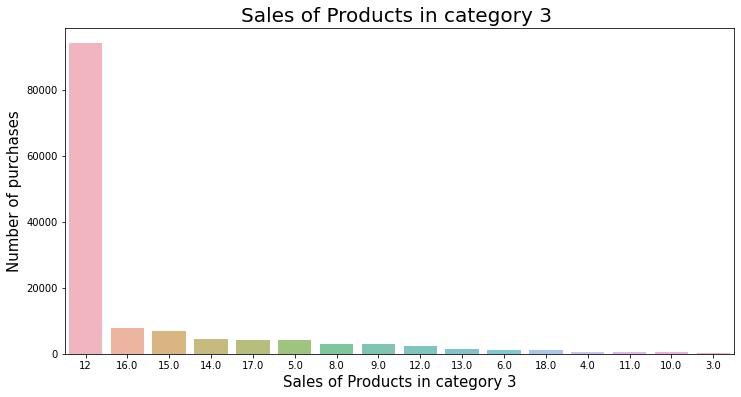

In [42]:
count=data['Product_Category_3'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values, alpha=0.7)
plt.title("Sales of Products in category 3 ", fontsize=20)
plt.ylabel('Number of purchases', fontsize=15)
plt.xlabel("Sales of Products in category 3", fontsize=15)
plt.show()

### Insights drawn:
* **Males** showed more interest in the black friday sales than as compared to that of females.
*  **Age group 26-35** were more active than other age groups.
* People from **20 different occupations** showed their interest in the black friday sales.
* People from **city B** were more as compared to city A & C.
* Maximum people are staying in their respective city from **1 year**.
* **59.09% **people were unmarried  and 40.91 % were married among total participation.
* There are 18 subcategories of products in category 1.
* There are 17 subcategories of products in category 2.
* There are 15 subcategories of products in category 3.

## **Data Preparation & Training**

Data Preparation:

In [48]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135529 entries, 0 to 135528
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     135529 non-null  int64 
 1   Product_ID                  135529 non-null  object
 2   Gender                      135529 non-null  object
 3   Age                         135529 non-null  object
 4   Occupation                  135529 non-null  int64 
 5   City_Category               135529 non-null  object
 6   Stay_In_Current_City_Years  135529 non-null  object
 7   Marital_Status              135529 non-null  int64 
 8   Product_Category_1          135529 non-null  int64 
 9   Product_Category_2          135529 non-null  object
 10  Product_Category_3          135529 non-null  object
 11  Purchase                    135529 non-null  object
dtypes: int64(4), object(8)
memory usage: 12.4+ MB


In [58]:
columns=['Age','Gender']
data1=data[columns]
dummies=pd.get_dummies(data1,columns=['Age','Gender'])
dummies

,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
135524,0,0,0,1,0,0,0,1,0
135525,0,0,0,1,0,0,0,1,0
135526,0,0,0,1,0,0,0,1,0
135527,0,0,0,1,0,0,0,1,0


In [59]:
mergeddata= pd.concat([data,dummies],axis='columns')
mergeddata

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,9,12,8370,1,0,0,0,0,0,0,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,1,0,0,0,0,0,0,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9,12,1422,1,0,0,0,0,0,0,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,12,1057,1,0,0,0,0,0,0,1,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9,12,7969,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,P00131042,F,36-45,20,B,3,0,8,9,12,5950,0,0,0,1,0,0,0,1,0
135525,1002934,P00049542,F,36-45,20,B,3,0,8,9,12,6005,0,0,0,1,0,0,0,1,0
135526,1002934,P00303242,F,36-45,20,B,3,0,5,8,12,5364,0,0,0,1,0,0,0,1,0
135527,1002934,P00222842,F,36-45,20,B,3,0,8,9,12,8094,0,0,0,1,0,0,0,1,0


In [66]:
newdata=mergeddata.drop(['Age','Gender'],axis='columns')
newdata

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,1000001,P00069042,10,A,2,0,3,9,12,8370,1,0,0,0,0,0,0,1,0
1,1000001,P00248942,10,A,2,0,1,6,14,15200,1,0,0,0,0,0,0,1,0
2,1000001,P00087842,10,A,2,0,12,9,12,1422,1,0,0,0,0,0,0,1,0
3,1000001,P00085442,10,A,2,0,12,14,12,1057,1,0,0,0,0,0,0,1,0
4,1000002,P00285442,16,C,4+,0,8,9,12,7969,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135524,1002934,P00131042,20,B,3,0,8,9,12,5950,0,0,0,1,0,0,0,1,0
135525,1002934,P00049542,20,B,3,0,8,9,12,6005,0,0,0,1,0,0,0,1,0
135526,1002934,P00303242,20,B,3,0,5,8,12,5364,0,0,0,1,0,0,0,1,0
135527,1002934,P00222842,20,B,3,0,8,9,12,8094,0,0,0,1,0,0,0,1,0


In [67]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135529 entries, 0 to 135528
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     135529 non-null  int64 
 1   Product_ID                  135529 non-null  object
 2   Occupation                  135529 non-null  int64 
 3   City_Category               135529 non-null  object
 4   Stay_In_Current_City_Years  135529 non-null  object
 5   Marital_Status              135529 non-null  int64 
 6   Product_Category_1          135529 non-null  int64 
 7   Product_Category_2          135529 non-null  object
 8   Product_Category_3          135529 non-null  object
 9   Purchase                    135529 non-null  object
 10  Age_0-17                    135529 non-null  uint8 
 11  Age_18-25                   135529 non-null  uint8 
 12  Age_26-35                   135529 non-null  uint8 
 13  Age_36-45                   1

In [68]:
newdata1=newdata.drop(['User_ID', 'Product_ID','City_Category','Stay_In_Current_City_Years'],axis=1)
newdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135529 entries, 0 to 135528
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Occupation          135529 non-null  int64 
 1   Marital_Status      135529 non-null  int64 
 2   Product_Category_1  135529 non-null  int64 
 3   Product_Category_2  135529 non-null  object
 4   Product_Category_3  135529 non-null  object
 5   Purchase            135529 non-null  object
 6   Age_0-17            135529 non-null  uint8 
 7   Age_18-25           135529 non-null  uint8 
 8   Age_26-35           135529 non-null  uint8 
 9   Age_36-45           135529 non-null  uint8 
 10  Age_46-50           135529 non-null  uint8 
 11  Age_51-55           135529 non-null  uint8 
 12  Age_55+             135529 non-null  uint8 
 13  Gender_F            135529 non-null  uint8 
 14  Gender_M            135529 non-null  uint8 
dtypes: int64(3), object(3), uint8(9)
memory usage: 7.4+

In [70]:
#converting data into int datatype to avoid errors below.
prepareddata=newdata1.astype(int)
prepareddata.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M
0,10,0,3,9,12,8370,1,0,0,0,0,0,0,1,0
1,10,0,1,6,14,15200,1,0,0,0,0,0,0,1,0
2,10,0,12,9,12,1422,1,0,0,0,0,0,0,1,0
3,10,0,12,14,12,1057,1,0,0,0,0,0,0,1,0
4,16,0,8,9,12,7969,0,0,0,0,0,0,1,0,1


In [71]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135529 entries, 0 to 135528
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Occupation          135529 non-null  int64
 1   Marital_Status      135529 non-null  int64
 2   Product_Category_1  135529 non-null  int64
 3   Product_Category_2  135529 non-null  int64
 4   Product_Category_3  135529 non-null  int64
 5   Purchase            135529 non-null  int64
 6   Age_0-17            135529 non-null  int64
 7   Age_18-25           135529 non-null  int64
 8   Age_26-35           135529 non-null  int64
 9   Age_36-45           135529 non-null  int64
 10  Age_46-50           135529 non-null  int64
 11  Age_51-55           135529 non-null  int64
 12  Age_55+             135529 non-null  int64
 13  Gender_F            135529 non-null  int64
 14  Gender_M            135529 non-null  int64
dtypes: int64(15)
memory usage: 15.5 MB


In [72]:
prepareddata.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Gender_F', 'Gender_M'],
      dtype='object')

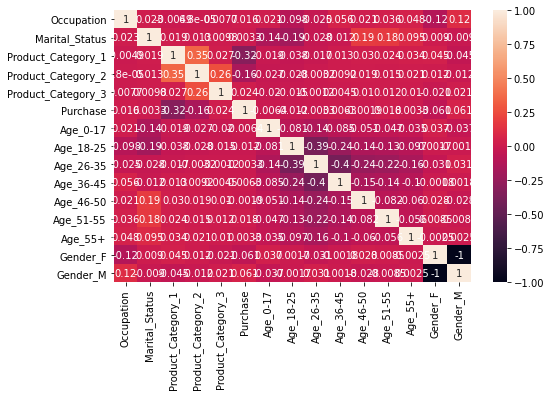

In [77]:
plt.figure(figsize = (8,5))
corr = prepareddata.corr() 
sns.heatmap(corr, annot=True)

Data Training:

In [73]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have feature and y will have our target.
x=prepareddata[['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3','Age_0-17',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'Gender_F', 'Gender_M']]  
y=prepareddata['Purchase']

In [84]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=500) 
#Ratio used for splitting training and testing data is 8:2 respectively

## **Model Creation**

Linear Regression

In [85]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [86]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# Making predictions 
pred1 = reg1.predict(x_test)

In [88]:
pred1

array([11985.76708622,  9195.72713214,  8645.63601049, ...,
        8367.47574872,  7195.64892141,  9666.83970241])

In [89]:
print("Accuracy of the Linear Regression model is: \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the Linear Regression model is: 
 
0.10917788356418145


Lasso Regression

In [114]:
# Importing model
from sklearn.linear_model import Lasso
reg2 = Lasso()

In [115]:
# Fitting data into the model.
reg2.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
# Making predictions 
pred2 = reg2.predict(x_test)

In [117]:
pred2

array([11981.61061675,  9190.39020579,  8634.58356488, ...,
        8377.3016256 ,  7185.8047466 ,  9660.66316948])

In [118]:
print("Accuracy of the Lasso Regression model is: \n ") 
print(reg2.score(x_train,y_train))

Accuracy of the Lasso Regression model is: 
 
0.10917263618957707


Ridge Regression

In [120]:
# Importing model
from sklearn.linear_model import Ridge
reg3 = Ridge()

In [121]:
# Fitting data into the model.
reg3.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
# Making predictions 
pred3 = reg3.predict(x_test)

In [123]:
pred3

array([11985.75849669,  9195.72874974,  8645.62569415, ...,
        8367.49439201,  7195.63952716,  9666.82596479])

In [124]:
print("Accuracy of the Ridge Regression model is: \n ") 
print(reg3.score(x_train,y_train))

Accuracy of the Ridge Regression model is: 
 
0.10917788351809166


Decision Tree Regressor

In [125]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg4 = DecisionTreeRegressor()

In [126]:
#Fitting data into the model.
reg4.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [127]:
# Making predictions on Test data 
pred4 = reg4.predict(x_test)

In [128]:
pred4

array([12581.25      ,  6017.85714286,  8806.6       , ...,
        9856.        , 23487.        ,  5748.63793103])

In [129]:
print("Accuracy of the Decision Tree Regressor  model is: \n ") 
print(reg4.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model is: 
 
0.7462014183446483


Random Forest Regression

In [130]:
#Importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor 
reg5 = RandomForestRegressor(n_estimators=100)

In [131]:
# Fitting data into the model.
reg5.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [132]:
#making predictions.
pred5 = reg5.predict(x_test)

In [133]:
pred5

array([12443.91938095,  6099.25527767,  8767.99899206, ...,
        8003.07423739, 21546.38842857,  5751.28965855])

In [134]:
print("Accuracy of the Random Forest Regressor  model is: \n ") 
print(reg5.score(x_train,y_train))

Accuracy of the Random Forest Regressor  model is: 
 
0.7380166796878624


## **Performance Evaluation**

In [135]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t          RootMeanSquareError  \t\t    Accuracy of the model") 
print("""Linear Regression       \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Lasso Regression        \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))
print("""Ridge Regression        \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(x_train,y_train)))
print("""Decision Tree Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), reg4.score(x_train,y_train)))
print("""Random Forest Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred5)), reg5.score(x_train,y_train)))

Model			          RootMeanSquareError  		    Accuracy of the model
Linear Regression       		 4721.2664 	 		 0.1092
Lasso Regression        		 4721.2042 	 		 0.1092
Ridge Regression        		 4721.2662 	 		 0.1092
Decision Tree Regressor 		 3313.2533 	 		 0.7462
Random Forest Regressor 		 3127.9032 	 		 0.7380


### Conclusion:
Performance of Decision tree regressor is better in terms of accuracy as compared to linear regression, lasso regression, ridge regression and random forest regressor.